# Veriye İlk Bakış

## Veri seti hikayesi ve yapısının incelenmesi

In [2]:
import seaborn as sns

In [3]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


* veri setinin hikayesi nedir?

* *öncelikle veri setinin kopyasını alıyoruz ki ana veri seti bozulmasın*

In [4]:
df = planets.copy()

* *Verinin yapısal bilgilerine ulaşmak*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [7]:
import pandas as pd 
df.method = pd.Categorical(df.method)

In [8]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

## Veri Setinin Betimlenmesi

In [9]:
df.shape

(1035, 6)

* Eğer describe fonksiyonu Transpoz ile kullanırsak eksik veri ve kategorik değişkenleri göz ardı ederek veri.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## Eksik Değerlerin İncelenmesi

* Hiç eksik değer varmı sorusunu şu şekilde soruyoruz

In [11]:
df.isnull().values.any()

True

* hangi değişkende kaç tane eksik veri var?

In [12]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

## Kategorik değişkenlerin Öetine bakmak

In [21]:
df.select_dtypes(include=["category"]).head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [29]:
df.select_dtypes(include=["category"]).value_counts().count()

10

In [33]:
kat_df = df.select_dtypes(include=["category"]).value_counts()
kat_df

method                       
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [ ]:
* Kategorik değikenlerin sayısını tablolaştırmak için kullanılır. pandasın kendi methodlarından biridir.

<Axes: ylabel='method'>

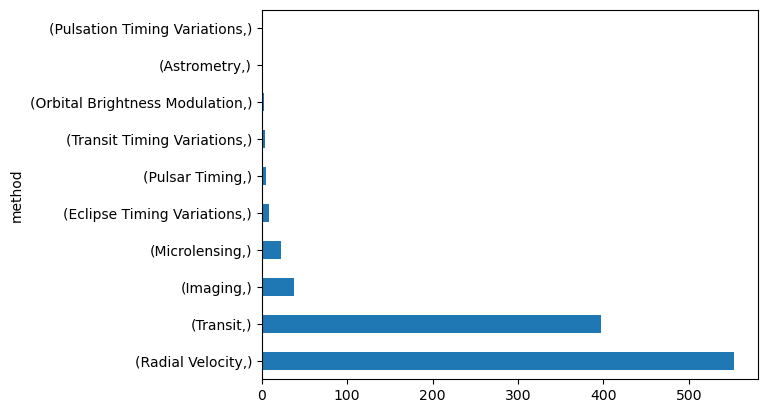

In [34]:
kat_df.plot.barh()

Text(0.5, 1.0, 'Methodlar')

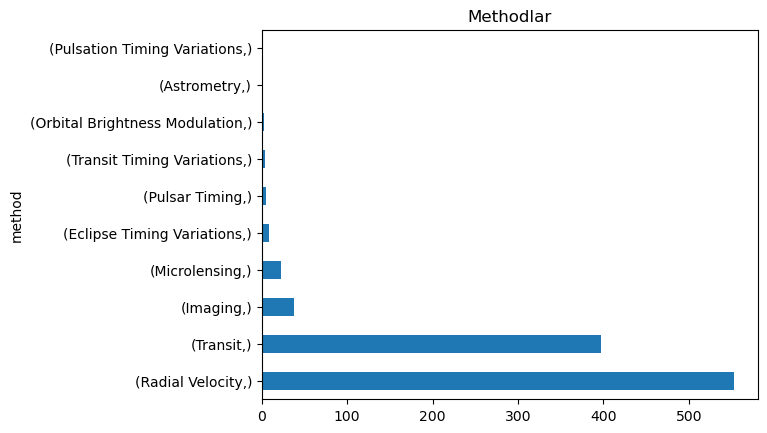

In [35]:
kat_df.plot.barh().set_title("Methodlar")